In [2]:
import numpy as np
import matplotlib.pyplot as plt

array([[16.87319855, 15.33508515],
       [15.33508515, 17.54968308]])

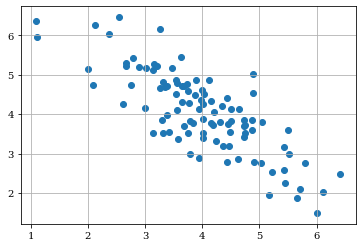

In [66]:
cov_true = np.array([1, -0.8, -0.8, 1]).reshape(2,2)
X = np.random.multivariate_normal(mean=[4,4], cov=cov_true, size=100)
plt.grid()
plt.scatter(X[:,0], X[:,1])
S = 1/100 * X.T.dot(X)
S

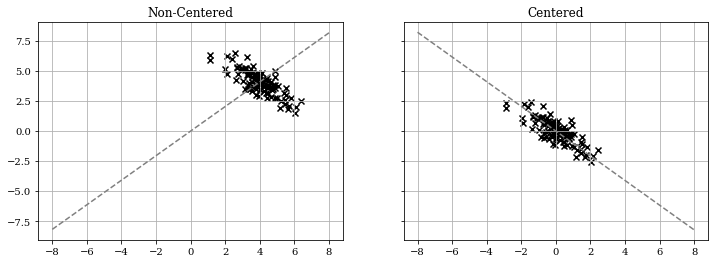

In [67]:
def project(X, v):
    proj = np.matmul(X, v)
    return np.array([v * proj[i] for i in range(len(X))])

def plot_pc(C, D, title, ax, upper=8):
    e, v = np.linalg.eigh(C)
    pc = v[:, 1]
    m = pc[1] / pc[0]
    
    x = np.linspace(-8, upper, 100)
    ax.plot(x, m*x, color='0.50', ls='dashed')
    
    projected = project(D, pc)
    ax.grid()
    ax.set_title(title)
    ax.scatter(D[:,0], D[:,1], marker='x', color='k')

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex='all', sharey='all')
plot_pc(S, X, 'Non-Centered', axs[0])
X_c = X - np.mean(X, axis=0)
S_c = 1/100 * X_c.T.dot(X_c)
plot_pc(S_c, X_c, 'Centered', axs[1])
plt.savefig('Non-Centered.eps', format='eps', dpi=1200, bbox_inches='tight')

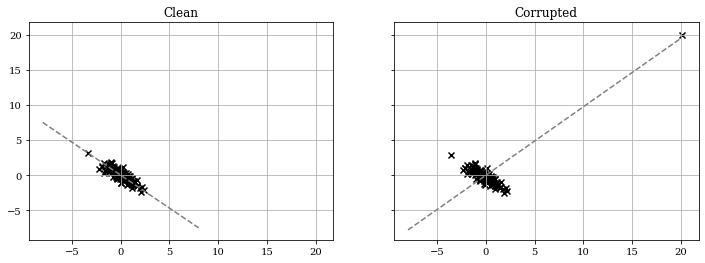

In [63]:
X_ = np.copy(X)
# Corrupt X
X_[0] += 20 
plt.rc('font', family='serif')
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex='all', sharey='all')
Z = X - np.mean(X, axis=0)
S = 1/100 * Z.T.dot(Z)
plot_pc(S, Z, 'Clean', axs[0])

Z_ = X_ - np.mean(X_, axis=0)
S_ = 1/100 * Z_.T.dot(Z_)
plot_pc(S_, Z_, 'Corrupted', axs[1], upper=20)

plt.savefig('corrupted.eps', format='eps', dpi=1200, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


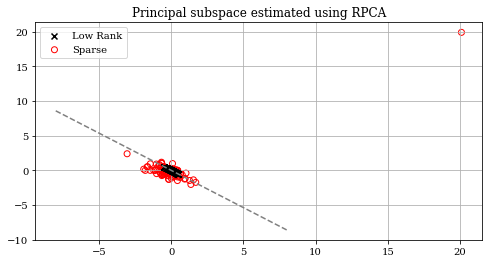

In [69]:
from src.dim_reduction import RPca
rpca = RPca()
rpca.setup(Z_)
L, S = rpca.fit(Z_)
plt.figure(figsize=(8,4))

plt.scatter(L[:, 0], L[:, 1], marker='x', c='k', zorder=2, label='Low Rank')
plt.scatter(S[:, 0], S[:, 1], marker='o', edgecolors='r', facecolors='none', zorder=1, label='Sparse')
grad = np.mean(L[:, 1] / L[:, 0])
x = np.linspace(-8, 8)
plt.plot(x, grad*x, color='0.50', ls='dashed')
plt.grid()
plt.legend()
plt.title('Principal subspace estimated using RPCA')
plt.savefig('rpca_corrupted.eps', format='eps', dpi=1200, bbox_inches='tight')